# Example of using the Borehole3D class

### Imports

In [1]:
import matplotlib.pyplot as plt
from striplog import Component, Decor, Legend, Interval, Lexicon
from core.omf import Borehole3D, striplog_legend_to_omf_legend 
from definitions import ROOT_DIR

### Define the components and the way to display them

In [2]:
components = [Component({'lithology': 'siltstone', 'colour': 'orange'}),
              Component({'lithology': 'anhydrite', 'colour': 'green'}),
              Component({'lithology': 'sandstone', 'grainsize': 'vf-f', 'colour': 'brown'}),
              Component({'lithology': 'dolomite', 'colour': 'cyan'}),
              Component({'lithology': 'siltstone', 'colour': 'red'}),
              Component({'lithology': 'limestone', 'colour':'yellow'})]
list_of_decors=[]
hatches = ['=', 'x', '.', 's', '=', 'b']
colours = ['#888888', '#882222', '#AAAAAA', '#CC22CC', '#CC2222', '#2222CC']

for i in range(len(components)):
    if hasattr(components[i], 'colour'):
        c = components[i].colour
    else:
        c=colours[i]
    
    if hasattr(components[i], 'hatch'):
        h = components[i].hatch
    else:
        h = hatches[i]
        
    d = {'color': c,
         'hatch': h,
         'component': components[i],
         'width': 3}
    decor = Decor(d)
    list_of_decors.append(decor)
    
legend = Legend(list_of_decors)
lexicon=Lexicon.default()

In [3]:
intervals=[]
top=[0,2,4,6,8,10]
base=[2,4,6,8,10,12]
for i in range(len(components)):     
    intervals.append(Interval(top=top[i], base=base[i], components=[components[i]],lexicon=lexicon))

### Create the Borehole 3D object using the legend

In [4]:
bh3d = Borehole3D(intervals, legend=legend, name='BH_test')

Borehole geometry created successfully !


### Display the striplog

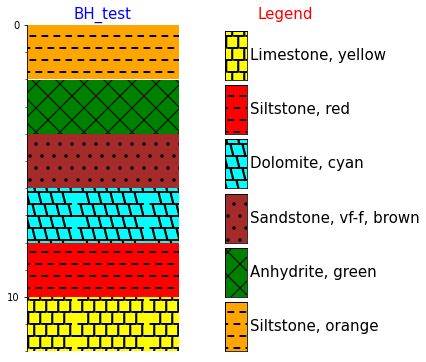

In [5]:
bh3d.log_plot()

### Display the borehole in 3D using the legend

[3 0 4 2 1 5]


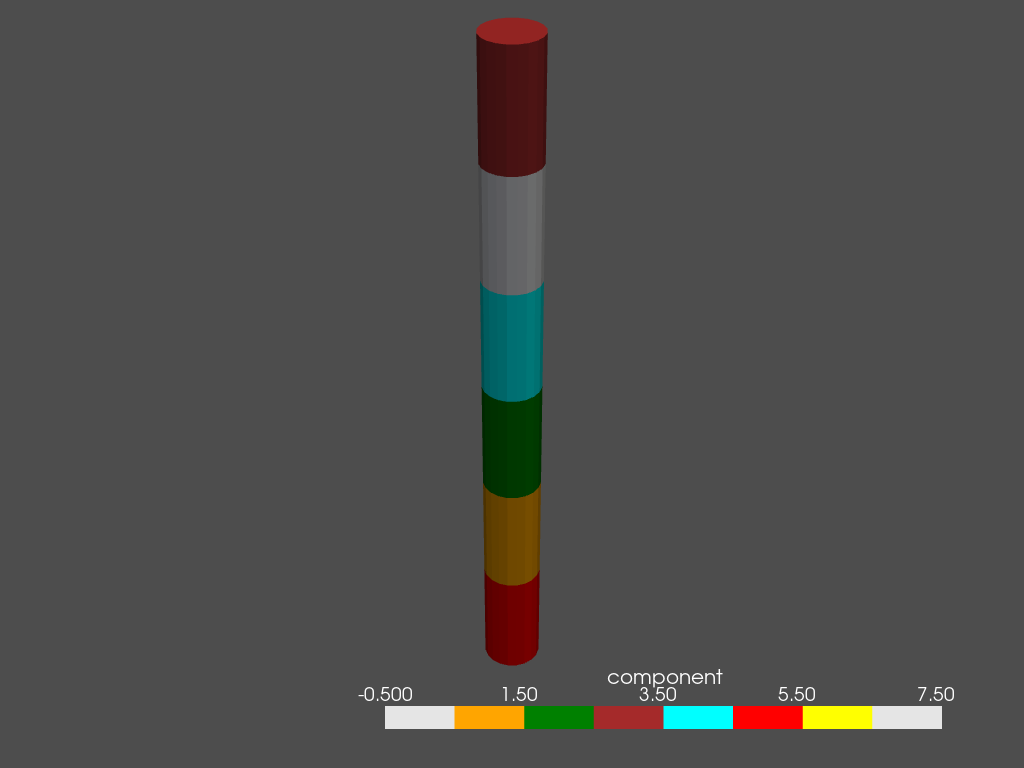

In [6]:
bh3d.plot3d()

### The Borehole in 3D using X3D for interaction within the notebook

In [7]:
bh3d.plot3d(x3d=True)

[3 0 4 2 1 5]


In [8]:
from core.omf import striplog_legend_to_omf_legend

In [9]:
omf_legend, c_map = striplog_legend_to_omf_legend(legend)

In [10]:
c_map

In [11]:
import numpy as np
x = np.ones([6, 6])
for i in range(6):
    x[i,:] = i*2 -1

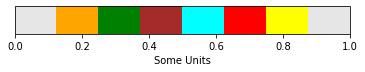

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)


cmap = mpl.cm.cool
#norm = mpl.colors.Normalize(vmin=5, vmax=10)

fig.colorbar(mpl.cm.ScalarMappable(cmap=c_map),
             cax=ax, orientation='horizontal', label='Some Units')

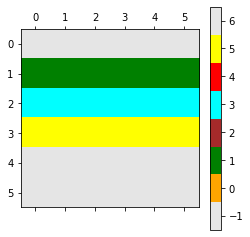

In [13]:
plt.matshow(x, cmap=c_map, vmin=-1.5, vmax=6.5)
plt.colorbar()

In [14]:
len(c_map.colors)

8

In [15]:
bh3d.components

[Component({'lithology': 'anhydrite', 'colour': 'green'}),
 Component({'lithology': 'siltstone', 'colour': 'red'}),
 Component({'lithology': 'dolomite', 'colour': 'cyan'}),
 Component({'lithology': 'siltstone', 'colour': 'orange'}),
 Component({'lithology': 'sandstone', 'grainsize': 'vf-f', 'colour': 'brown'}),
 Component({'lithology': 'limestone', 'colour': 'yellow'})]

In [16]:
for i in bh3d.intervals:
    print(i.primary, bh3d.components.index(i.primary), bh3d.components[ bh3d.components.index(i.primary)])
    

{'lithology': 'siltstone', 'colour': 'orange'} 3 {'lithology': 'siltstone', 'colour': 'orange'}
{'lithology': 'anhydrite', 'colour': 'green'} 0 {'lithology': 'anhydrite', 'colour': 'green'}
{'lithology': 'sandstone', 'grainsize': 'vf-f', 'colour': 'brown'} 4 {'lithology': 'sandstone', 'grainsize': 'vf-f', 'colour': 'brown'}
{'lithology': 'dolomite', 'colour': 'cyan'} 2 {'lithology': 'dolomite', 'colour': 'cyan'}
{'lithology': 'siltstone', 'colour': 'red'} 1 {'lithology': 'siltstone', 'colour': 'red'}
{'lithology': 'limestone', 'colour': 'yellow'} 5 {'lithology': 'limestone', 'colour': 'yellow'}


In [17]:
bh3d.components.index?